In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from police_api import PoliceAPI
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
# Load street crime data
df_street = pd.read_csv('crime_street_all_clean.csv')
df_street = df_street[::10] # Memory requirements
df_street.head()

,Unnamed: 0,Crime ID,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,datetime,force
0,0,NaN,-2.923123,53.175087,On or near Boundary Lane,E01018352,Cheshire West and Chester 044B,Anti-social behaviour,NaN,2018-08-01,north-wales-police
10,10,62ce44bf7324b85bcc1e73474156fe829b383cb5f8476b...,-3.812069,53.321071,On or near Pleasant Street,W01000132,Conwy 001A,Violence and sexual offences,Unable to prosecute suspect,2018-08-01,north-wales-police
20,20,NaN,-3.836450,53.327674,On or near Old Road,W01000146,Conwy 001B,Anti-social behaviour,NaN,2018-08-01,north-wales-police
30,30,d1d49fa45351f2761a77a973544d3efa882c1a62862a4a...,-3.833488,53.327576,On or near Tan-Yr-Ogof Road,W01000146,Conwy 001B,Criminal damage and arson,Awaiting court outcome,2018-08-01,north-wales-police
40,40,89e969c4913c32dc011126b9ad83580b9385622d518676...,-3.831316,53.328068,On or near Hill Terrace,W01000146,Conwy 001B,Possession of weapons,Further investigation is not in the public int...,2018-08-01,north-wales-police


In [3]:
from shapely.geometry import Point

In [4]:
def plot_scatterplot_forces(ax, gdf_map, df):
    """Plots a scaterplot of a dataframe with columns Latitude
    and Longitude on top of map of UK police forces."""
    
    # Convert df to geodataframe
    df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
    df['Coordinates'] = df['Coordinates'].apply(Point)
    gdf = gpd.GeoDataFrame(df, geometry='Coordinates')
    gdf.crs = {'init' :'epsg:4326'} 

    # Project both geodataframes to Mercator projection
    gdf_map = gdf_map.to_crs({'init': 'epsg:3395'}) 
    gdf = gdf.to_crs({'init': 'epsg:3395'})
    
    # Plot scatterplot
    gdf_map.plot(color='C0', ax=ax)
    gdf.plot(ax=ax, color='C1', markersize=0.1, alpha=0.1)

# Load geojson file of entire UK
gdf_uk = gpd.read_file("uk.geojson")

## Example plot

/home/fran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/fran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


(-1020959.2375596182, 254175.97723823664, 6281999.310796776, 8664735.362475786)

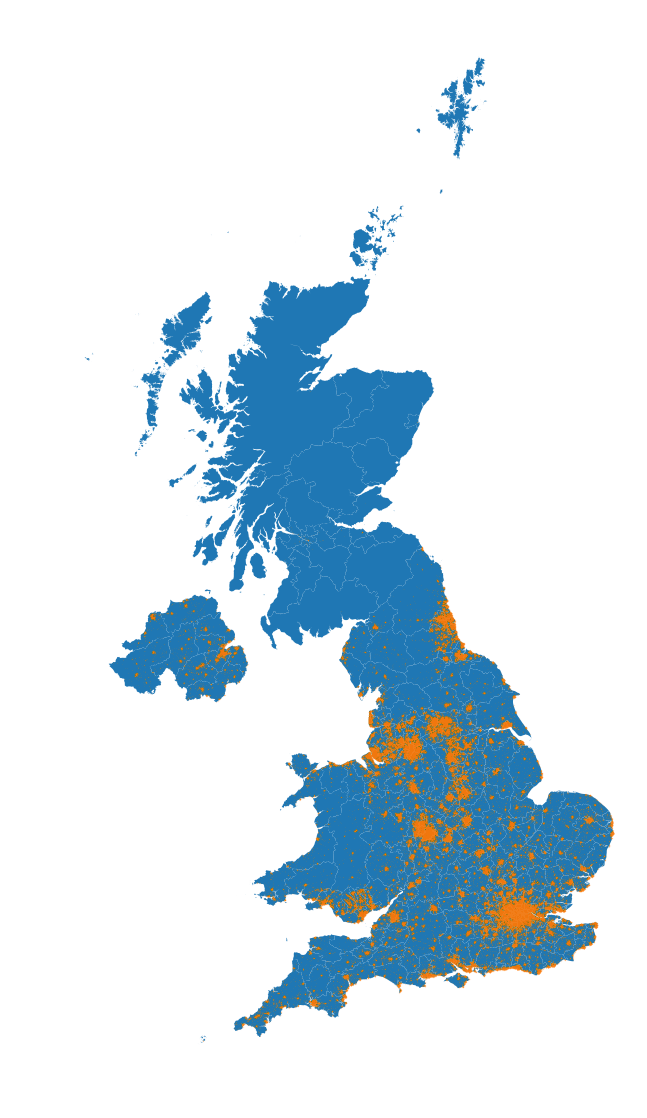

In [5]:
# Plot
fig, ax = plt.subplots(figsize=(20, 20))
plot_scatterplot_forces(ax, gdf_uk, df_street[['Longitude', 'Latitude']]) # Better to plot some subset of this data
plt.axis('off')